# Classification of dyes in multi-colour dual camera 3D-STORM experiments using logistic regression.

In [27]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

In [28]:
# Import the training data
df_equal=pd.read_csv('AF647_CF660C_training_data.csv')
print(df_equal.shape)
df_equal.head()

(27590, 3)


,log_intensity_cam1,log_intensity_cam2,idx
0,8.859101,6.997222,0
1,8.015134,6.008364,0
2,8.097002,6.499190,0
3,7.245725,4.308692,0
4,8.113232,6.541179,0


In [29]:
X= df_equal[['log_intensity_cam1', 'log_intensity_cam2']].to_numpy()
y= df_equal['idx'].to_numpy()
X, y

(array([[8.85910063, 6.99722156],
        [8.01513396, 6.00836409],
        [8.09700174, 6.49918973],
        ...,
        [7.35780827, 3.29535377],
        [7.78920576, 4.54176782],
        [7.92938645, 4.453507  ]]),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

## Train a logistic regression model

In [30]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=10000000000, random_state=42)

In [31]:
# funtion to plot predictions
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [32]:
# funtion to plot data
def plot_dataset(X, y, axes):   
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", markersize=2)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", markersize=2)
    plt.axis(axes)
    #plt.axis('equal')
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

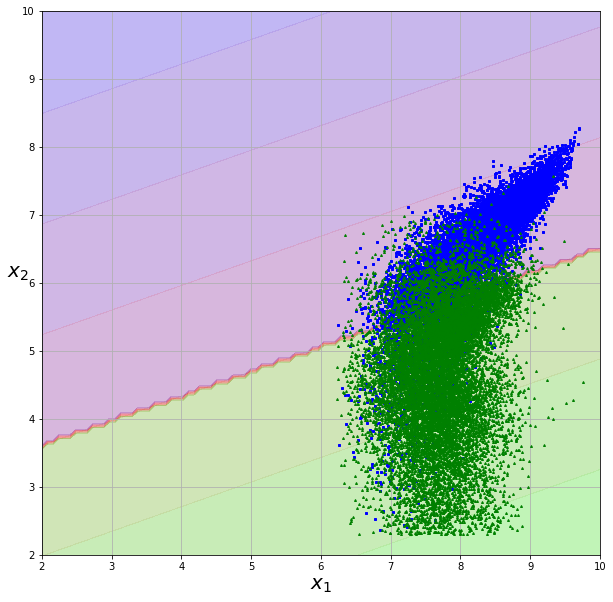

In [35]:
fig= plt.figure(figsize=(10,10))
plot_dataset(X, y, [2, 10, 2, 10])
plot_predictions(log_reg, [2, 10, 2, 10])
plt.show()

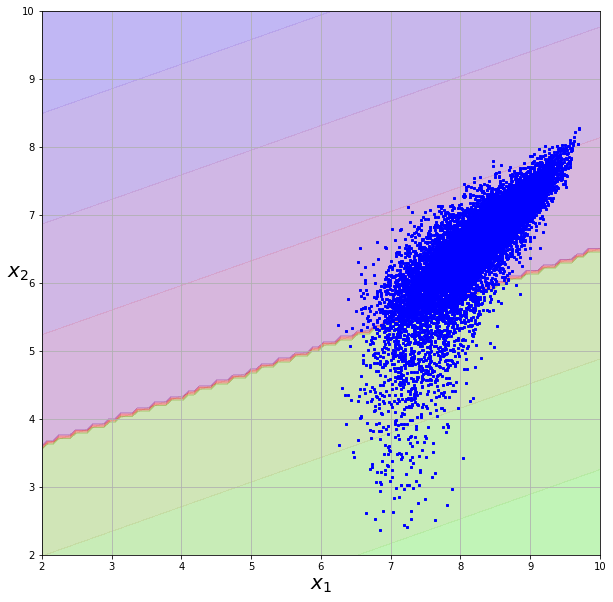

In [36]:
def plot_dataset0(X, y, axes):   
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", markersize=2)
    #plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", markersize=2)
    plt.axis(axes)
    #plt.axis('equal')
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
fig= plt.figure(figsize=(10,10))
plot_dataset0(X, y, [2, 10, 2, 10])
plot_predictions(log_reg, [2, 10, 2, 10])
plt.show()

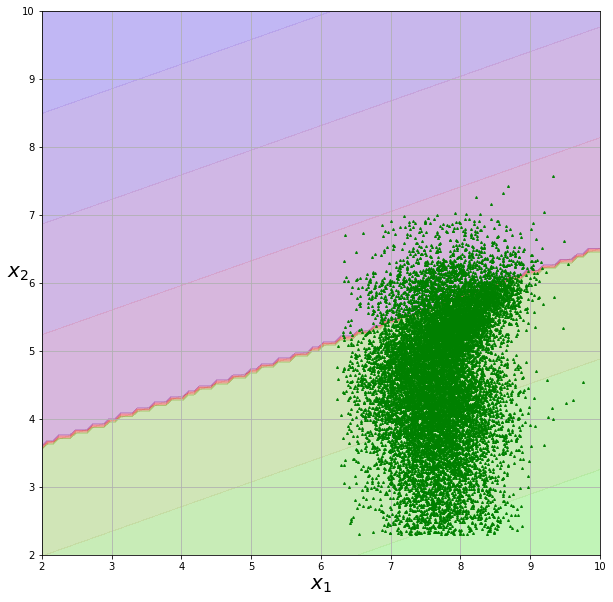

In [37]:
def plot_dataset1(X, y, axes):   
    #plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", markersize=2)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", markersize=2)
    plt.axis(axes)
    #plt.axis('equal')
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
fig= plt.figure(figsize=(10,10))
plot_dataset1(X, y, [2, 10, 2, 10])
plot_predictions(log_reg, [2, 10, 2, 10])
plt.show()

### Calculate the metrics of the model

In [38]:
from sklearn.metrics import confusion_matrix
y_logit_predicted = log_reg.predict(X)
print('Confusion Matrix')
confusion_matrix(y, y_logit_predicted)

Confusion Matrix


array([[12502,  1293],
       [ 1642, 12153]], dtype=int64)

In [39]:
from sklearn.metrics import precision_score, recall_score
# precision of the classifier is the accuracy of the positive predictions
print('Precision Score')
print(precision_score(y, y_logit_predicted))
# recall, also called sensitivity or the true positive rate (TPR) is the ratio of 
# positive instances that are correctly detected by the classifier
print('Recall Score')
print(recall_score(y, y_logit_predicted))
from sklearn.metrics import f1_score
# F1 score is the harmonic mean of precision and recall 
print('F1 Score')
print(f1_score(y, y_logit_predicted))

Precision Score
0.9038375725122713
Recall Score
0.8809713664371149
F1 Score
0.8922579934657319


## Here I load two colour data apply the above log_reg model to predict colour and then plot the points.

In [51]:
# read AF647-CF660C data, file11cell0
file11cell0=pd.read_csv('file11cell0.csv')
file11cell0["log_intensity_cam1"]=np.log(file11cell0['intensity_cam1'])
file11cell0["log_intensity_cam2"]=np.log(file11cell0['intensity_cam2'])
X_dual_file11cell0= file11cell0[['log_intensity_cam1', 'log_intensity_cam2']].to_numpy()
y_dual_file11cell0_pred = log_reg.predict(X_dual_file11cell0)
y_dual_file11cell0_pred_proba = log_reg.predict_proba(X_dual_file11cell0)
y_dual_file11cell0_pred, y_dual_file11cell0_pred_proba

(array([1, 1, 0, ..., 1, 1, 1], dtype=int64),
 array([[0.00745825, 0.99254175],
        [0.00162168, 0.99837832],
        [0.86679435, 0.13320565],
        ...,
        [0.01393274, 0.98606726],
        [0.00458954, 0.99541046],
        [0.00366886, 0.99633114]]))

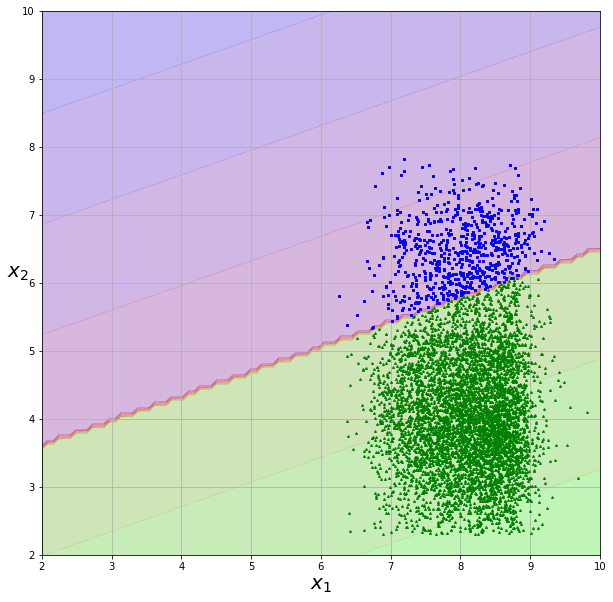

In [52]:
fig= plt.figure(figsize=(10,10))
plot_dataset(X_dual_file11cell0, y_dual_file11cell0_pred, [2, 10, 2, 10])
plot_predictions(log_reg, [2, 10, 2, 10])
plt.show()

In [60]:
file11cell0["prediction_CF660C"]=y_dual_file11cell0_pred
file11cell0["probability_CF660C"]=y_dual_file11cell0_pred_proba[:,1]
print(file11cell0.prediction_CF660C.value_counts())
file11cell0.head(2)

1    5387
0     700
Name: prediction_CF660C, dtype: int64


,id,frame,x,y,z,intensity_cam1,intensity_cam2,cell_cluster,log_intensity_cam1,log_intensity_cam2,prediction_CF660C,probability_CF660C
0,6,1.0,6968.138273,18002.344633,-22.273886,3370.4011,69.189270,0,8.122787,4.236846,1,0.992542
1,36,3.0,8185.757135,20462.485722,-265.031600,8157.7830,57.881565,0,9.006728,4.058399,1,0.998378


In [55]:
file11cell0_two_colour=file11cell0[['x', 'y', 'z', 'probability_CF660C']]
print(file11cell0_two_colour.shape)
file11cell0_two_colour.head(2)

(6087, 4)


,x,y,z,probability_CF660C
0,6968.138273,18002.344633,-22.273886,0.992542
1,8185.757135,20462.485722,-265.031600,0.998378


(5606.987261918307, 8808.335667011903, 17499.03741885645, 20855.79837810752)

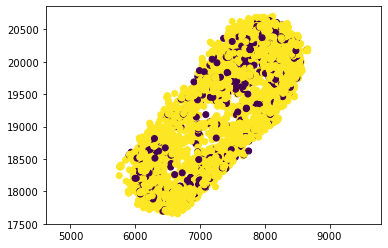

In [56]:
plt.scatter(file11cell0.x,file11cell0.y, c=file11cell0.prediction_CF660C)
plt.axis('equal')

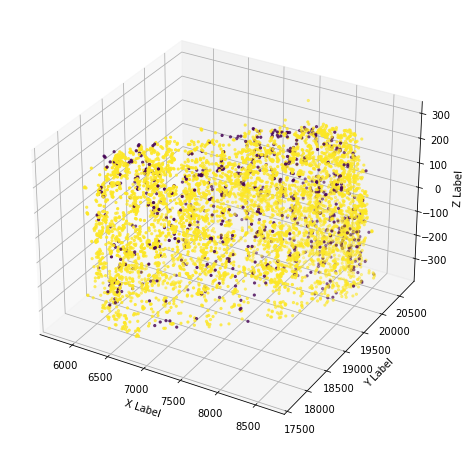

In [75]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file11cell0.x, file11cell0.y, file11cell0.z, s=5, c = file11cell0.prediction_CF660C, marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [57]:
# Save the cell with the colour assignment as a separate csv
file11cell0_two_colour.to_csv('file11cell0_two_colour.csv', index=False)